In [1]:
import pandas as pd
import numpy as np
import os,sys
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import apriori
from pandas import DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('lab2.csv')

In [3]:
df

,ACCOUNT,SERVICE,VISIT
0,500026,CKING,1
1,500026,SVG,2
2,500026,ATM,3
3,500026,ATM,4
4,500075,CKING,1
...,...,...,...
32362,999949,CKING,1
32363,999949,SVG,2
32364,999949,CD,3
32365,999949,CD,4


In [4]:
n_users=df.ACCOUNT.unique().shape[0]
n_items=df.SERVICE.unique().shape[0]
print('Total records: '+str(len(df)))
print('Number of Accounts: '+str(n_users)) 
print('Number of Services: '+str(n_items))

Total records: 32367
Number of Accounts: 7991
Number of Services: 13


In [5]:
bkt = df.groupby(['ACCOUNT','SERVICE']).sum()

In [6]:
bkt.iloc[0:10,:]

VISIT
ACCOUNT SERVICE       
500026  ATM          7
        CKING        1
        SVG          2
500075  ATM          4
        CKING        1
        MMDA         2
        SVG          3
        TRUST       11
500129  ATM          9
        CKING        1

In [7]:
bkt_new = bkt.groupby(['ACCOUNT','SERVICE']).size().unstack().reset_index().fillna(0).set_index('ACCOUNT')

In [8]:
bkt_new.iloc[0:10,:]

SERVICE,ATM,AUTO,CCRD,CD,CKCRD,CKING,HMEQLC,IRA,MMDA,MTG,PLOAN,SVG,TRUST
ACCOUNT,,,,,,,,,,,,,
500026,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
500075,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
500129,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
500256,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
500341,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
500350,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
500458,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
500595,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
500743,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [9]:
frequent_itemsets = apriori(bkt_new, min_support=0.05, use_colnames=True, max_len=None, verbose=1, low_memory=False)

Processing 48 combinations | Sampling itemset size 4


In [10]:
frequent_itemsets.head(10)

,support,itemsets
0,0.384558,(ATM)
1,0.092854,(AUTO)
2,0.154799,(CCRD)
3,0.245276,(CD)
4,0.113002,(CKCRD)
5,0.857840,(CKING)
6,0.164685,(HMEQLC)
7,0.108372,(IRA)
8,0.174446,(MMDA)
9,0.074334,(MTG)


### Association rules

In [11]:
assc = association_rules(frequent_itemsets,metric='lift',min_threshold=0.8)

In [12]:
assc

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ATM),(CKING),0.384558,0.857840,0.361907,0.941100,1.097058,0.032018,2.413577
1,(CKING),(ATM),0.857840,0.384558,0.361907,0.421882,1.097058,0.032018,1.064562
2,(HMEQLC),(ATM),0.164685,0.384558,0.085346,0.518237,1.347619,0.022015,1.277480
3,(ATM),(HMEQLC),0.384558,0.164685,0.085346,0.221933,1.347619,0.022015,1.073577
4,(ATM),(SVG),0.384558,0.618696,0.256914,0.668077,1.079814,0.018990,1.148772
...,...,...,...,...,...,...,...,...,...
141,"(ATM, SVG)","(HMEQLC, CKING)",0.256914,0.164685,0.060944,0.237214,1.440407,0.018634,1.095084
142,(CKING),"(HMEQLC, ATM, SVG)",0.857840,0.060944,0.060944,0.071043,1.165718,0.008664,1.010872
143,(HMEQLC),"(ATM, SVG, CKING)",0.164685,0.248530,0.060944,0.370061,1.489001,0.020014,1.192925
144,(ATM),"(HMEQLC, SVG, CKING)",0.384558,0.111500,0.060944,0.158477,1.421313,0.018065,1.055823


### Sorting rules

In [13]:
frame = DataFrame(assc)
R_result = frame[(frame['lift']>=1)&(frame['confidence']>=0.5)&(frame['antecedents']!=frozenset({'CD'}))&(frame['consequents']!=frozenset({'CD'}))]
R_result.sort_values(by=['lift'],axis=0,ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
140,"(HMEQLC, SVG)","(ATM, CKING)",0.111500,0.361907,0.060944,0.546577,1.510268,0.020591,1.407279
53,(HMEQLC),"(ATM, CKING)",0.164685,0.361907,0.085346,0.518237,1.431961,0.025745,1.324496
133,"(HMEQLC, SVG, CKING)",(ATM),0.111500,0.384558,0.060944,0.546577,1.421313,0.018065,1.357325
69,"(HMEQLC, SVG)",(ATM),0.111500,0.384558,0.060944,0.546577,1.421313,0.018065,1.357325
125,"(CD, ATM)","(SVG, CKING)",0.071581,0.541734,0.052559,0.734266,1.355398,0.013781,1.724526
2,(HMEQLC),(ATM),0.164685,0.384558,0.085346,0.518237,1.347619,0.022015,1.277480
51,"(HMEQLC, CKING)",(ATM),0.164685,0.384558,0.085346,0.518237,1.347619,0.022015,1.277480
139,"(HMEQLC, ATM)","(SVG, CKING)",0.085346,0.541734,0.060944,0.714076,1.318130,0.014709,1.602754
102,(CKCRD),"(SVG, CKING)",0.113002,0.541734,0.079715,0.705426,1.302163,0.018498,1.555691
108,(HMEQLC),"(SVG, CKING)",0.164685,0.541734,0.111500,0.677052,1.249785,0.022285,1.419006


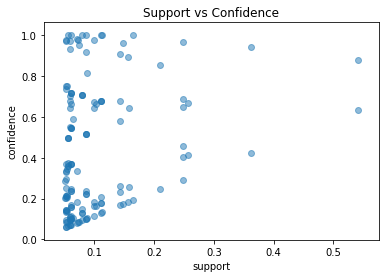

In [14]:
plt.scatter(assc['support'], assc['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

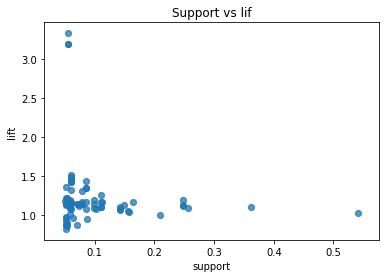

In [15]:
plt.scatter(assc['support'], assc['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs lif')
plt.show()

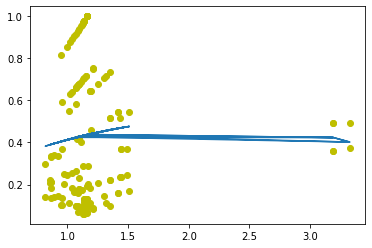

In [16]:
fit = np.polyfit(assc['lift'], assc['confidence'], 2)
fit_fn = np.poly1d(fit)
plt.plot(assc['lift'], assc['confidence'], 'yo', assc['lift'], 
fit_fn(assc['lift']))